In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [79]:
# Load the dataset
df = pd.read_csv('Housing.xlsx')

# Data Exploration
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

In [80]:
# Data Cleaning
# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

# Convert categorical variables to numeric
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})


Number of duplicates: 0


In [81]:
# Convert furnishingstatus to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

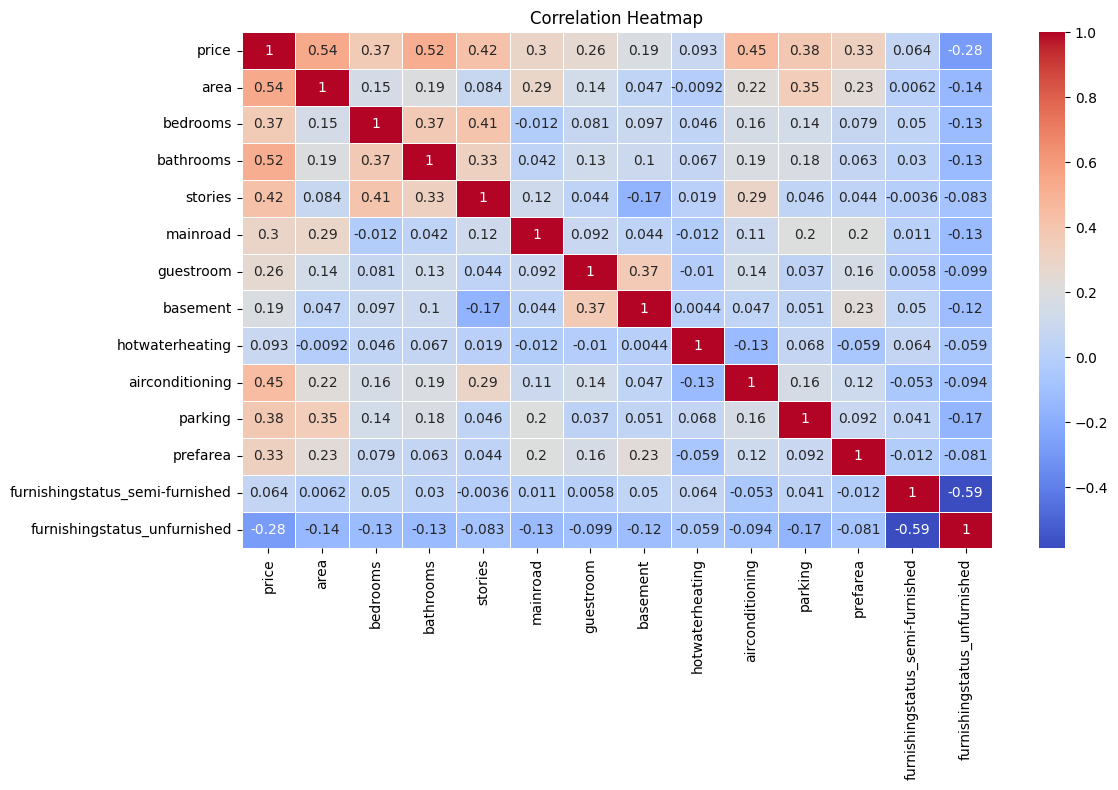

In [82]:
# Data Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

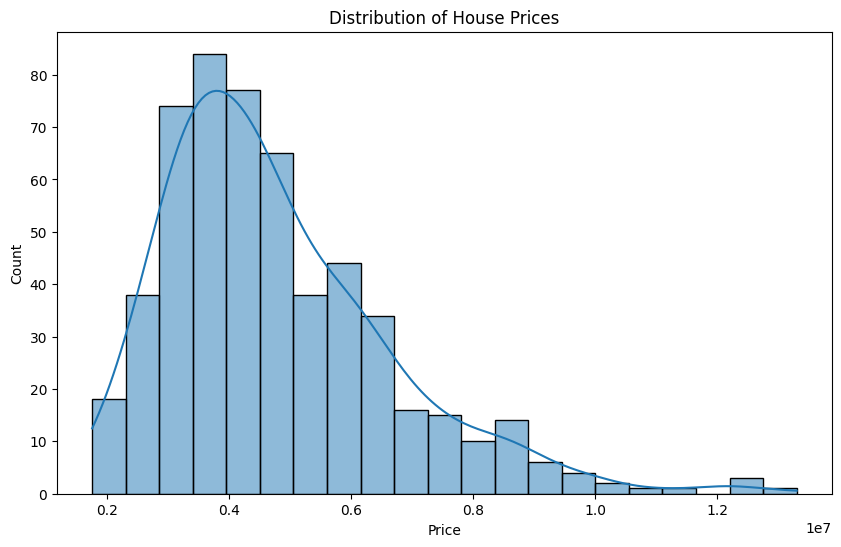

In [83]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

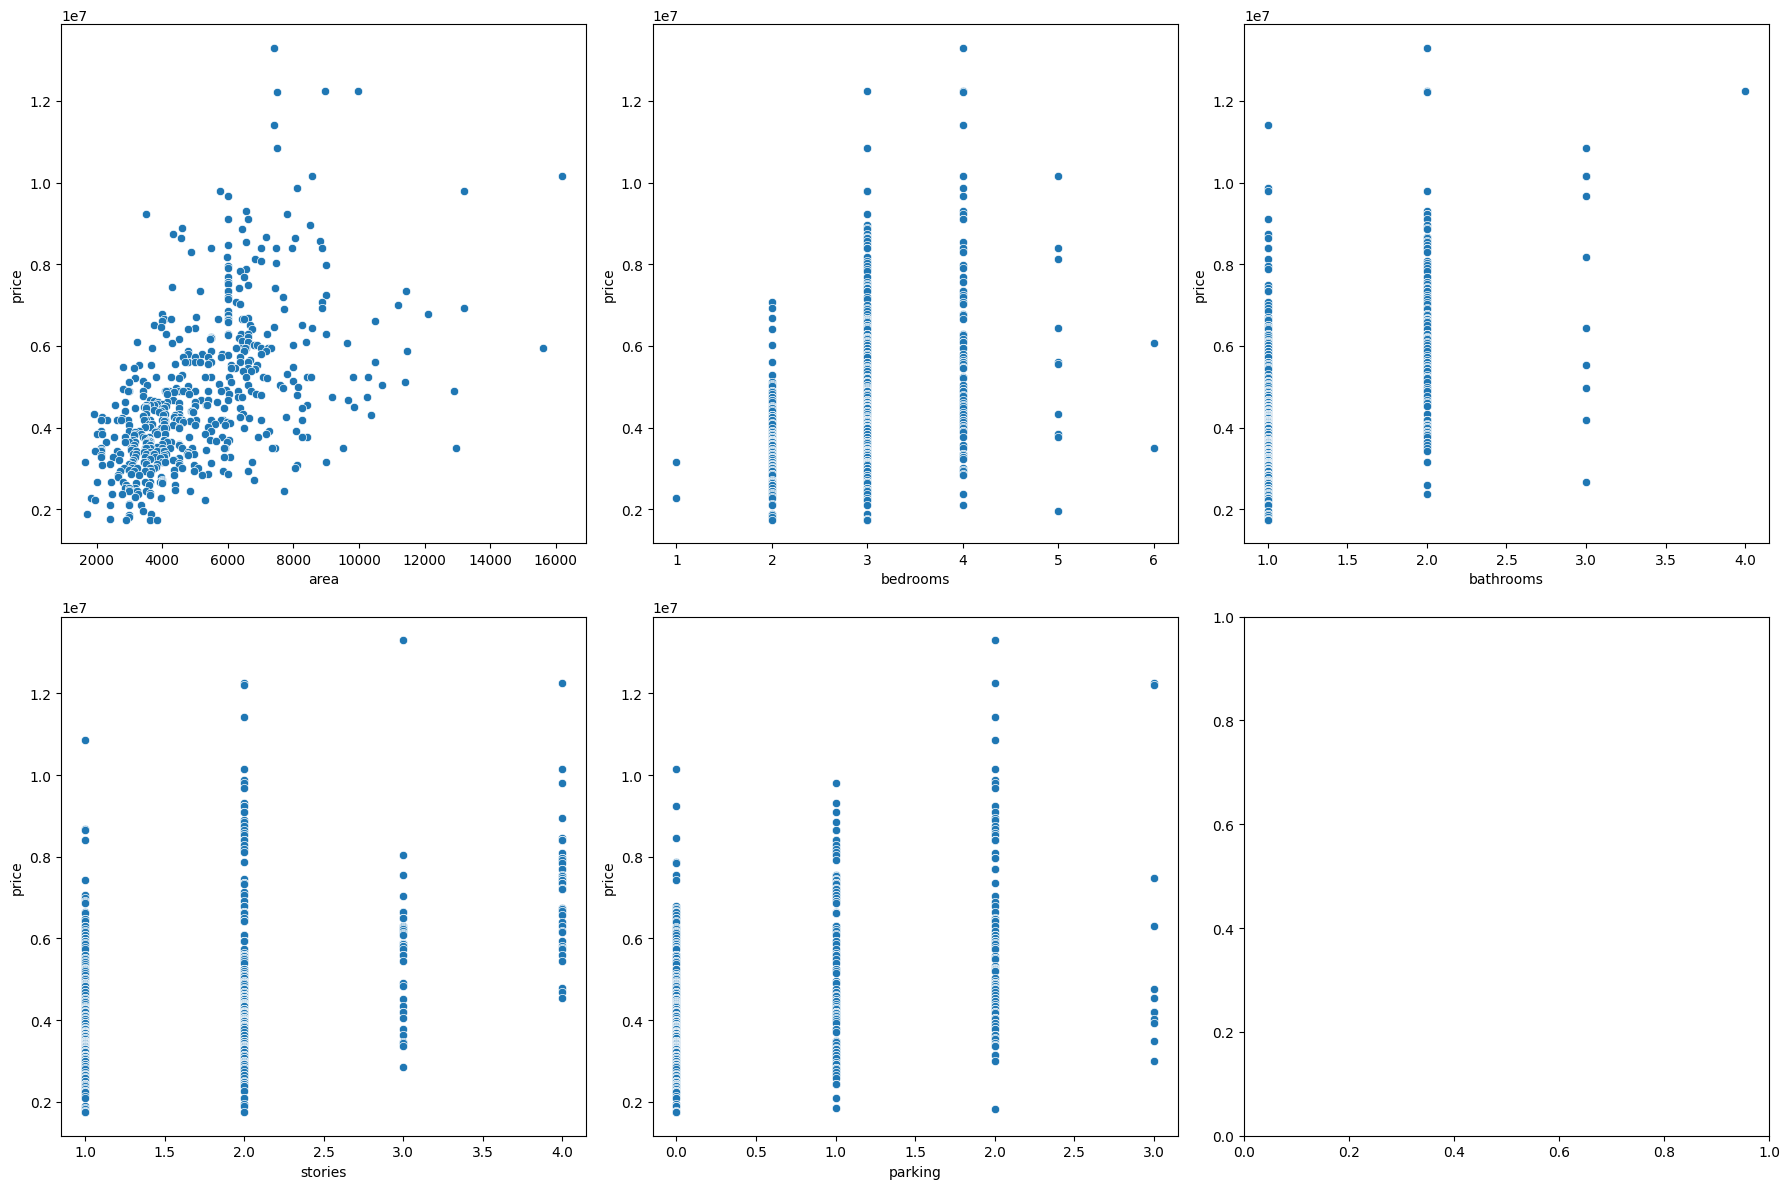

In [84]:
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=df, x=feature, y='price', ax=axes[i//3, i%3])
plt.tight_layout()
plt.show()

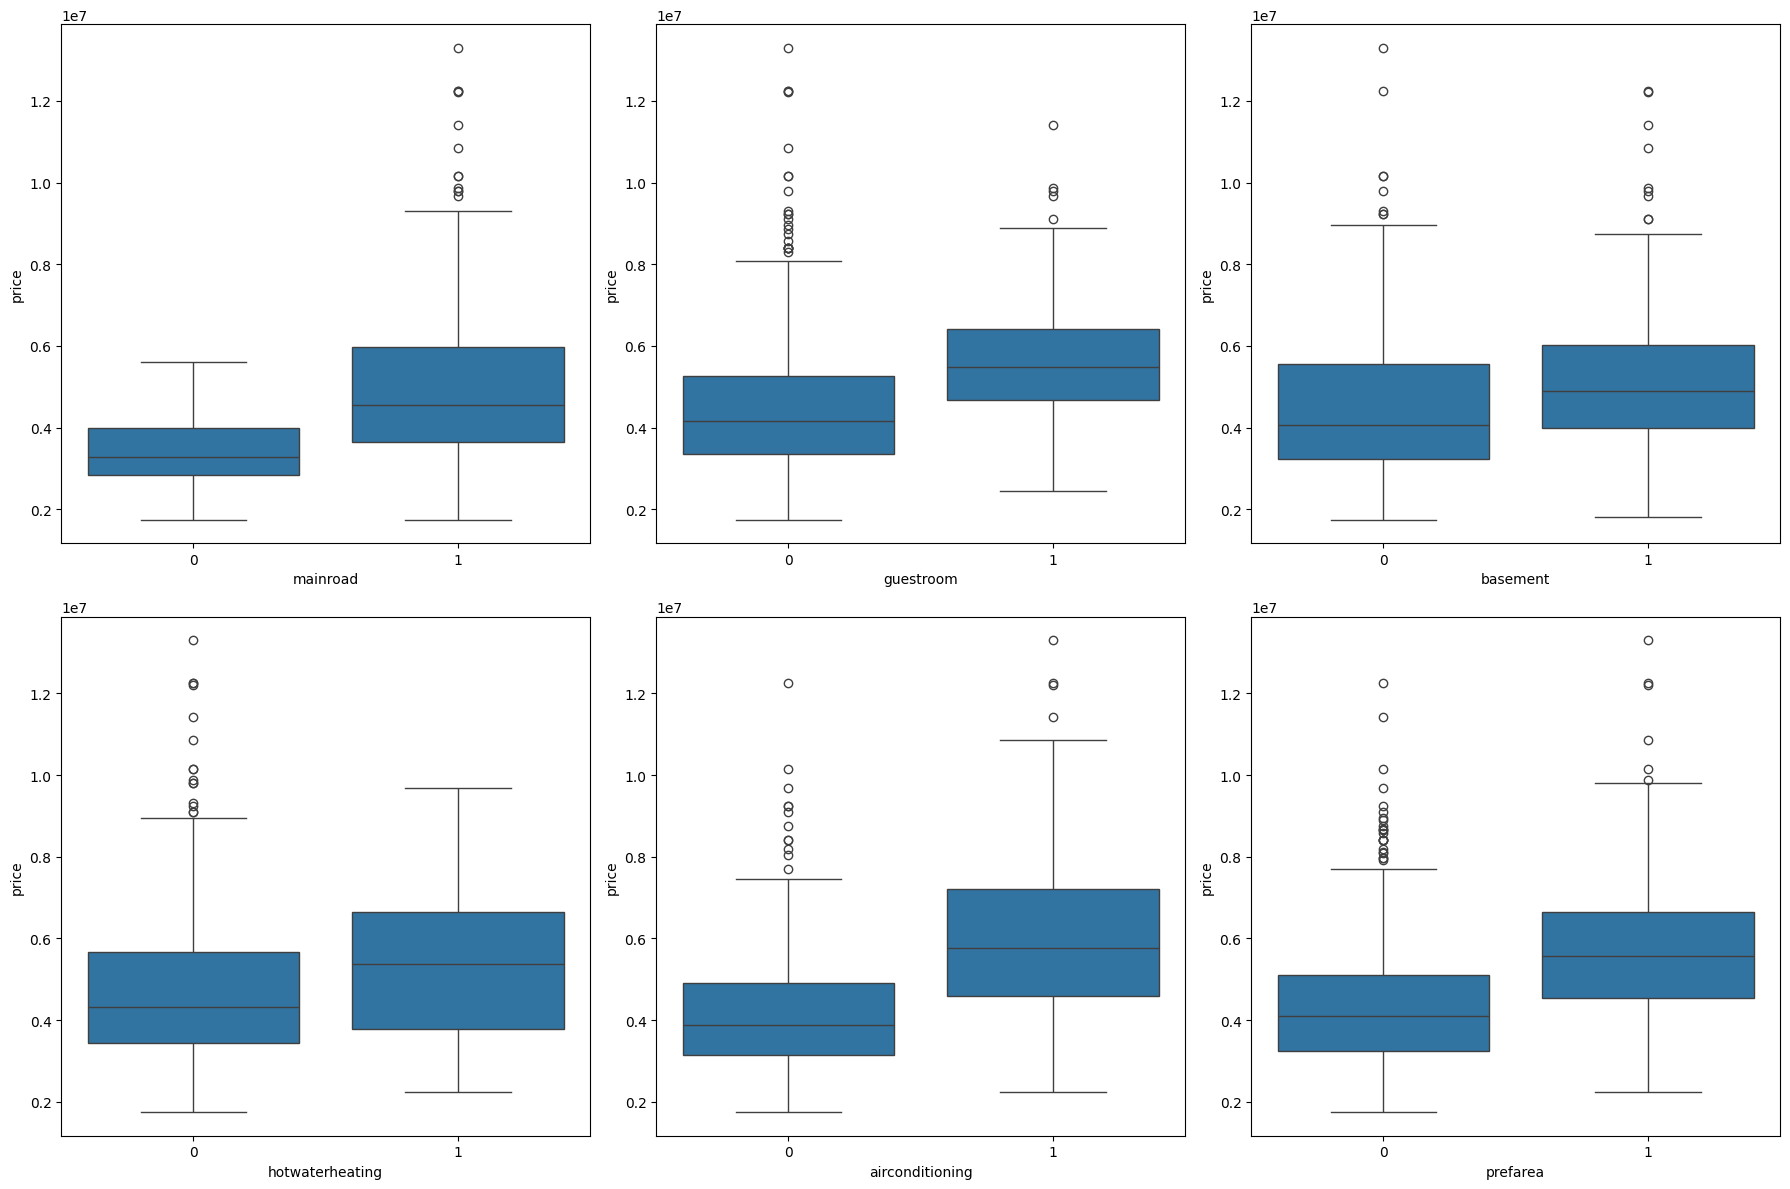

In [85]:
# Box plots for categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, feature in enumerate(categorical_features):
    sns.boxplot(data=df, x=feature, y='price', ax=axes[i//3, i%3])
plt.tight_layout()
plt.show()

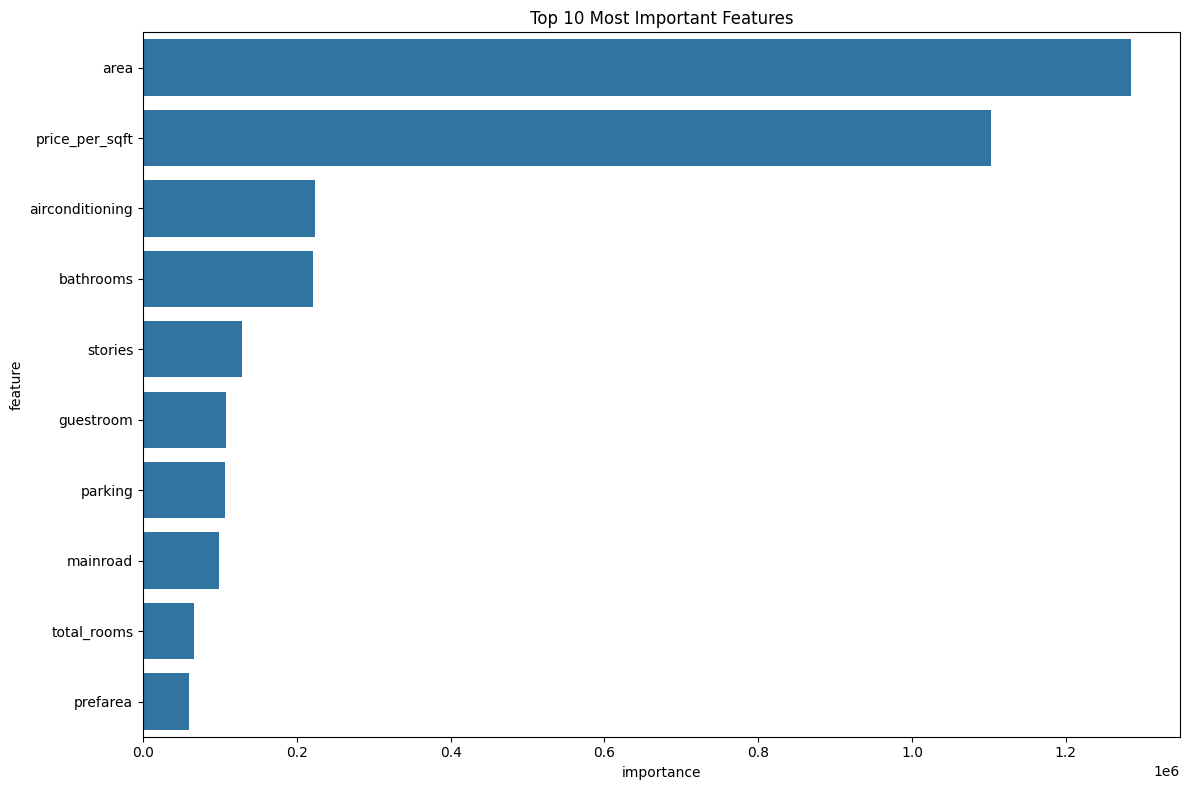

In [86]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

In [87]:
# Feature Engineering
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['price_per_sqft'] = df['price'] / df['area']

# Prepare data for modeling
X = df.drop(['price'], axis=1)
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
# Scale the features
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Now you can use X_train_scaled and X_test_scaled for training your model

In [89]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [90]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [91]:
for actual, predicted in zip(y_test, y_pred):
    print(f"{actual:.2f} --> {predicted:.2f}")

4060000.00 --> 4153964.36
6650000.00 --> 6536765.62
3710000.00 --> 3279170.84
6440000.00 --> 5677985.12
2800000.00 --> 2570803.03
4900000.00 --> 4236201.84
5250000.00 --> 5667100.21
4543000.00 --> 4947249.36
2450000.00 --> 2424303.66
3353000.00 --> 3302088.92
10150000.00 --> 9164757.11
2660000.00 --> 2440883.15
3360000.00 --> 3260345.55
3360000.00 --> 3150644.45
2275000.00 --> 2285016.78
2660000.00 --> 3650185.54
2660000.00 --> 3584700.33
7350000.00 --> 6195232.81
2940000.00 --> 3276220.97
2870000.00 --> 2984585.74
6720000.00 --> 6312016.00
5425000.00 --> 5418566.01
1890000.00 --> 1757698.41
5250000.00 --> 5377797.98
4193000.00 --> 4779715.87
12250000.00 --> 8828448.25
3080000.00 --> 3292024.24
5110000.00 --> 6238479.18
9800000.00 --> 9113805.74
2520000.00 --> 2598125.82
6790000.00 --> 7113808.76
3500000.00 --> 3694677.76
6650000.00 --> 6664845.78
2940000.00 --> 3379835.78
3325000.00 --> 3141839.33
4200000.00 --> 4870815.13
4900000.00 --> 4771318.26
3290000.00 --> 3813268.46
3500000.00

In [92]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [93]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 587217091347.0691
R-squared Score: 0.8838245265717736


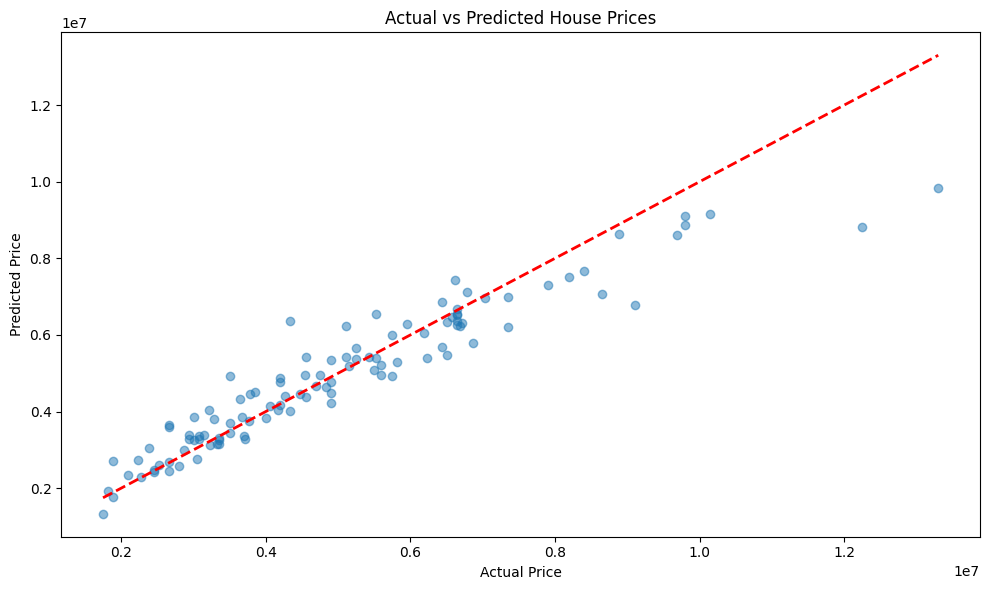

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()